### <font color='green'>Make a multiclass logistic regression to predict the star type:-

In [2170]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2171]:
sns.set(rc={"figure.figsize":(15,8)})

Absolute Temperature (in K)
Relative Luminosity (L/Lo)
Relative Radius (R/Ro)
Absolute Magnitude (Mv)
Star Color (white,Red,Blue,Yellow,yellow-orange etc)
Spectral Class (O,B,A,F,G,K,,M)
Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**

In [2172]:
df=pd.read_csv('Stars.csv')

In [2173]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Brown Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Brown Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Brown Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Brown Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Brown Dwarf
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,Hypergiant
236,30839,834042.000000,1194.0000,-10.63,Blue,O,Hypergiant
237,8829,537493.000000,1423.0000,-10.73,White,A,Hypergiant
238,9235,404940.000000,1112.0000,-11.23,White,A,Hypergiant


In [2174]:
df.duplicated().sum()

0

In [2175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 13.2+ KB


In [2176]:
numeric_columns=df.select_dtypes('number').columns

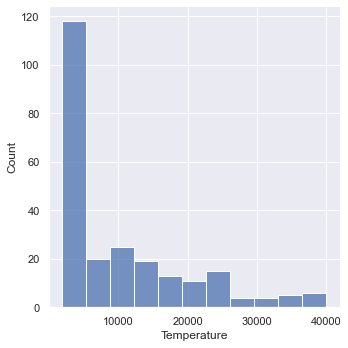

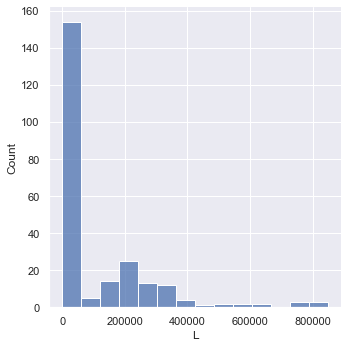

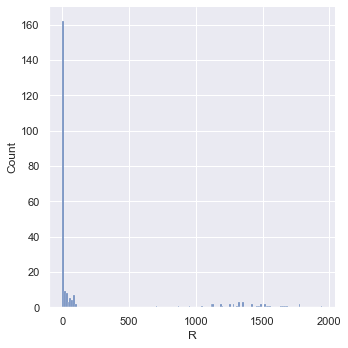

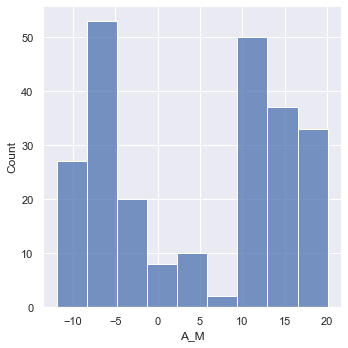

In [2177]:
for feature in numeric_columns:
    sns.displot(data=df,x=feature)

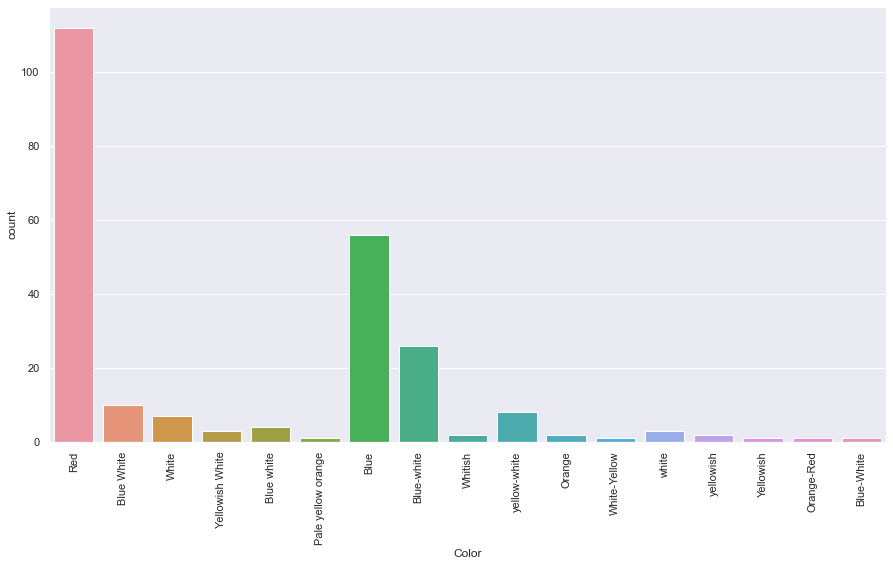

In [2178]:
sns.countplot(data=df,x='Color')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Spectral_Class', ylabel='count'>

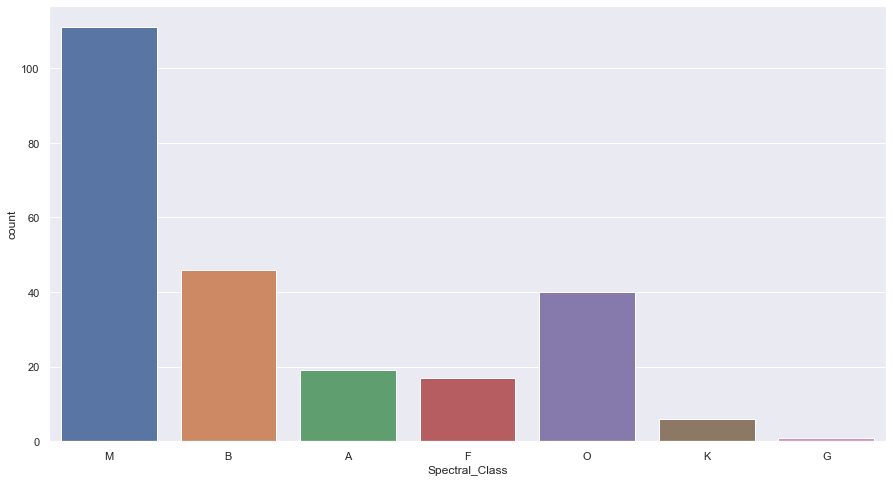

In [2179]:
sns.countplot(data=df,x='Spectral_Class')

<AxesSubplot:xlabel='Type', ylabel='count'>

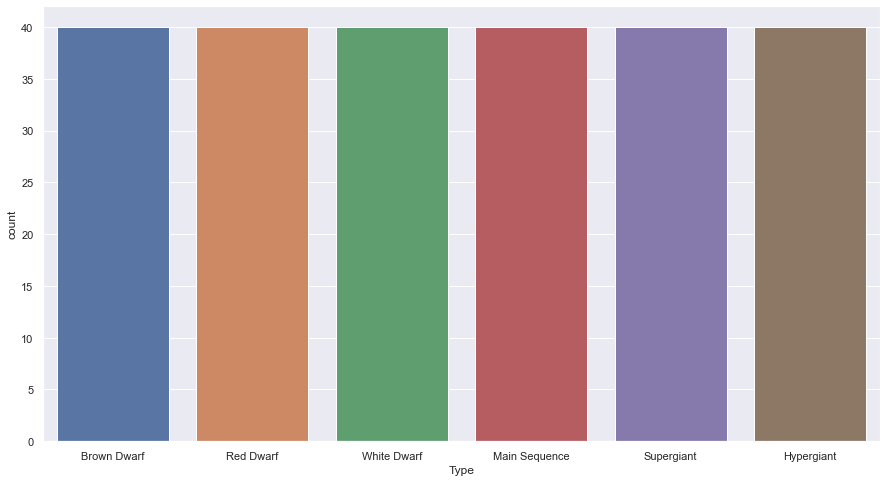

In [2180]:
sns.countplot(data=df,x='Type')
#it's balanaced

In [2181]:
from datasist.structdata import detect_outliers

In [2182]:
df.shape[0]

240

In [2183]:
# only 11 row i will drop them
len(detect_outliers(df,0,['Temperature']))

11

In [2184]:
idx=detect_outliers(df,0,['Temperature'])

In [2185]:
df.shape

(240, 7)

In [2186]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Brown Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Brown Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Brown Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Brown Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Brown Dwarf
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,Hypergiant
236,30839,834042.000000,1194.0000,-10.63,Blue,O,Hypergiant
237,8829,537493.000000,1423.0000,-10.73,White,A,Hypergiant
238,9235,404940.000000,1112.0000,-11.23,White,A,Hypergiant


<AxesSubplot:xlabel='Temperature'>

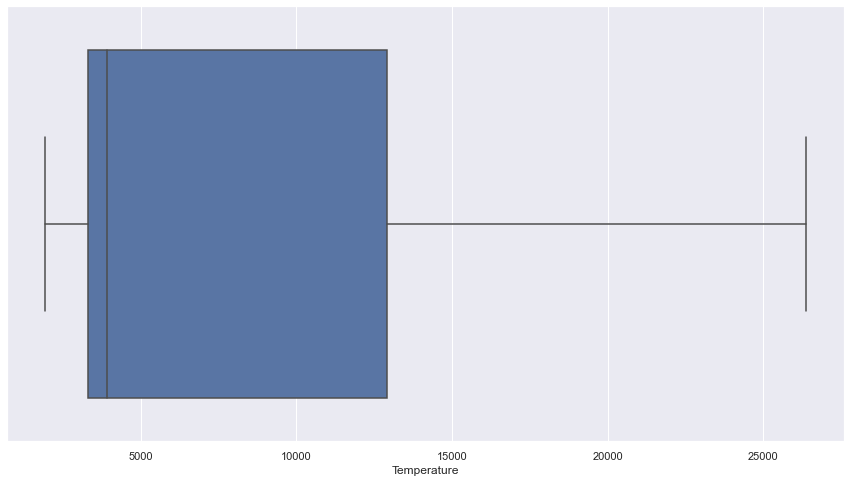

In [2187]:
sns.boxplot(data=df[df['Temperature']<27700],x='Temperature')

<AxesSubplot:xlabel='Temperature'>

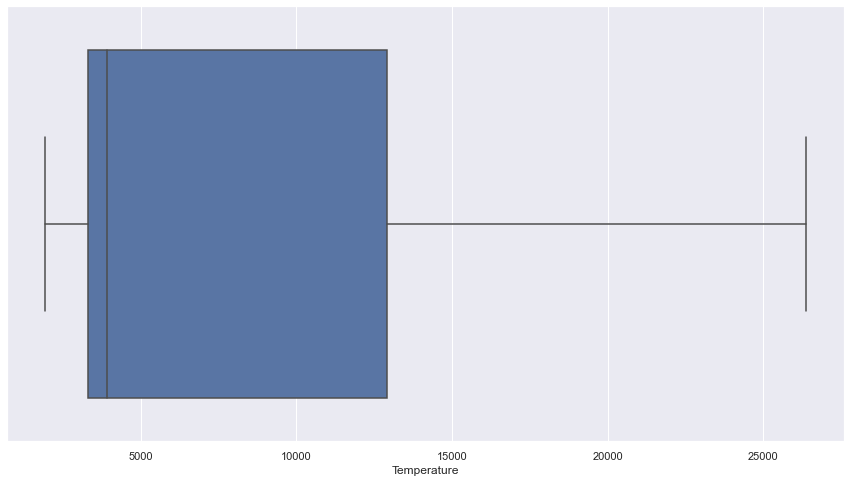

In [2188]:
sns.boxplot(data=df[df['Temperature']<27700],x='Temperature')

In [2189]:
def temp_outliers(x):
    if x>27700:
        return np.nan
    else:
        return x

In [2190]:
df['Temperature']=df['Temperature'].apply(temp_outliers)

In [2191]:
df.isnull().sum()

Temperature       18
L                  0
R                  0
A_M                0
Color              0
Spectral_Class     0
Type               0
dtype: int64

In [2192]:
# now i will put these values by their type
df['Temperature']=df.groupby('Type')['Temperature'].apply(lambda x:x.fillna(x.mean()))

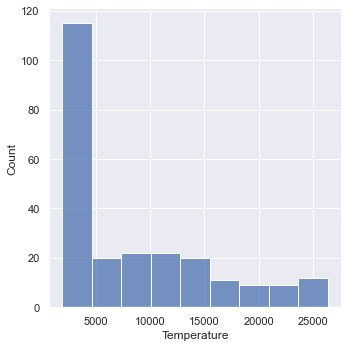

In [2193]:
sns.displot(data=df,x='Temperature')

<AxesSubplot:xlabel='L'>

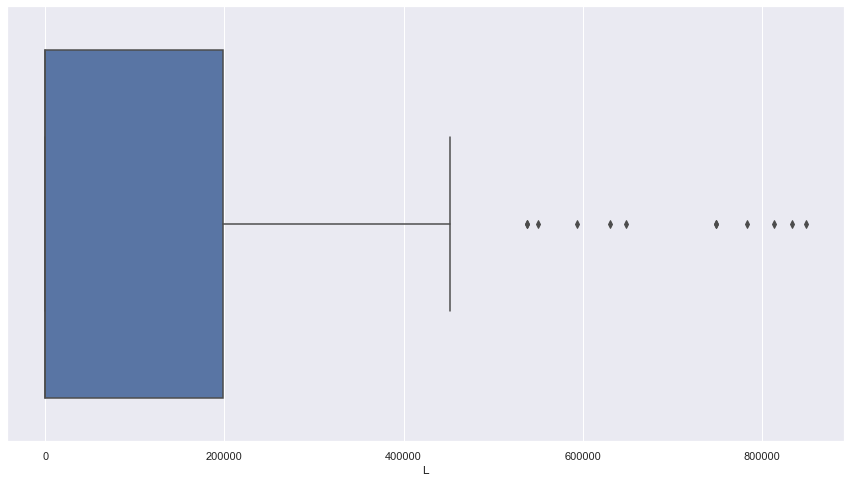

In [2194]:
sns.boxplot(data=df,x='L')

<AxesSubplot:xlabel='L'>

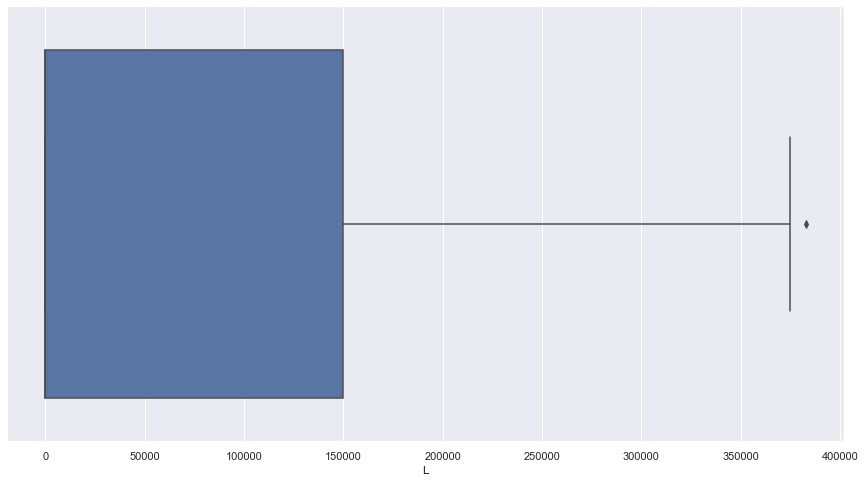

In [2195]:
sns.boxplot(data=df[df['L']<400000],x='L')

In [2196]:
def L_outliers(x):
    if x>400000:
        return np.nan
    else:
        return x

In [2197]:
df['L']=df['L'].apply(L_outliers)

In [2198]:
df['L'].isnull().sum()

15

In [2199]:
df['L']=df.groupby('Type')['L'].apply(lambda l:l.fillna(l.mean()))

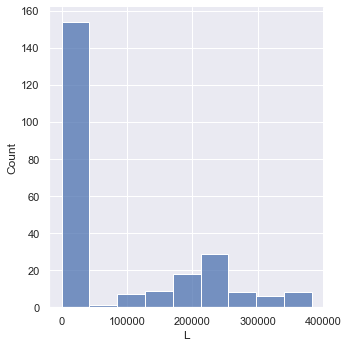

In [2200]:
sns.displot(data=df,x='L')

<AxesSubplot:xlabel='R'>

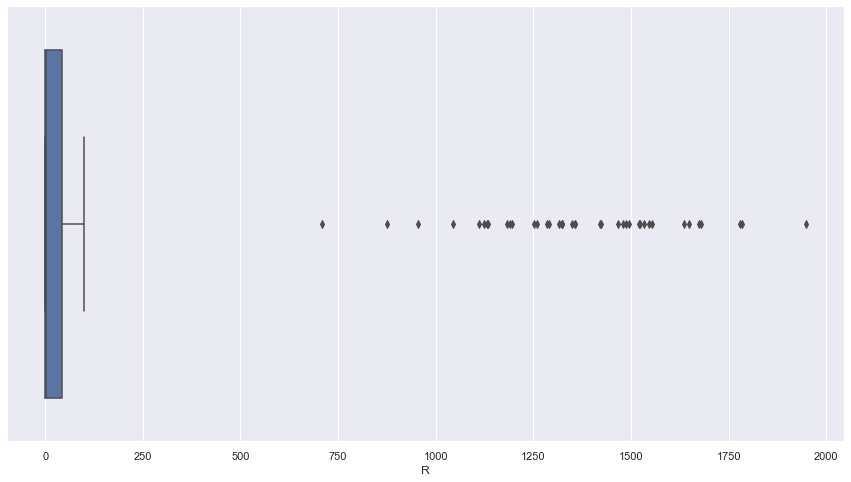

In [2201]:
sns.boxplot(data=df,x='R')

In [2202]:
idx=detect_outliers(df,0,['R'])

In [2203]:
for i in idx:
    df.loc[i,'R']=np.nan

In [2204]:
df['R'].unique()

array([1.700e-01, 1.542e-01, 1.020e-01, 1.600e-01, 1.030e-01, 1.100e-01,
       1.270e-01, 9.600e-02, 1.300e-01, 5.100e-01, 3.761e-01, 1.960e-01,
       3.930e-01, 1.400e-01, 2.400e-01, 4.700e-01, 1.967e-01, 3.510e-01,
       8.400e-03, 1.234e-02, 1.100e-02, 1.000e-02, 1.400e-02, 9.840e-03,
       9.700e-03, 1.280e-02, 1.300e-02, 1.060e+01, 6.300e+00, 7.200e+00,
       2.890e+00, 9.000e-01, 1.800e+00, 1.120e+00, 9.800e-01, 1.106e+00,
       9.900e-01, 1.900e+01, 2.300e+01, 8.800e+01, 1.700e+01, 2.500e+01,
       2.900e+01, 4.500e+01, 8.900e+01, 8.400e+01, 2.600e+01,       nan,
       5.700e-02, 1.900e-01, 9.400e-02, 9.180e-02, 1.160e-01, 1.320e-01,
       9.300e-02, 9.110e-02, 1.180e-01, 1.200e-01, 2.730e-01, 3.800e-01,
       1.800e-01, 3.500e-01, 2.910e-01, 3.070e-01, 9.800e-02, 1.610e-01,
       1.200e-02, 9.200e-03, 9.500e-03, 1.500e-02, 8.900e-03, 1.090e-02,
       8.700e-03, 8.920e-03, 1.310e-02, 9.100e-01, 8.650e-01, 7.950e-01,
       1.130e+00, 2.630e+00, 6.980e+00, 8.760e-01, 

In [2205]:
df[df['R'].isna()==True]

,Temperature,L,R,A_M,Color,Spectral_Class,Type
50,3490.000000,270000.0000,NaN,-9.40,Red,M,Hypergiant
51,3750.000000,283000.0000,NaN,-7.63,Red,M,Hypergiant
52,3834.000000,272000.0000,NaN,-9.20,Red,M,Hypergiant
53,3749.000000,223970.1875,NaN,-8.05,Orange,M,Hypergiant
54,3650.000000,310000.0000,NaN,-7.79,Red,M,Hypergiant
55,3450.000000,263000.0000,NaN,-11.75,Red,M,Hypergiant
56,3660.000000,363000.0000,NaN,-11.92,Red,M,Hypergiant
57,3450.000000,174000.0000,NaN,-11.28,Red,M,Hypergiant
58,3752.000000,209000.0000,NaN,-11.24,Red,M,Hypergiant
59,3535.000000,195000.0000,NaN,-11.36,Red,M,Hypergiant


In [2206]:
from sklearn.impute import KNNImputer

In [2207]:
imputer=KNNImputer(n_neighbors=5)

In [2208]:
df_impute=imputer.fit_transform(df[['R']])

In [2209]:
df['R']=pd.DataFrame(df_impute,columns=imputer.get_feature_names_out())

In [2210]:
df.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

<AxesSubplot:xlabel='A_M'>

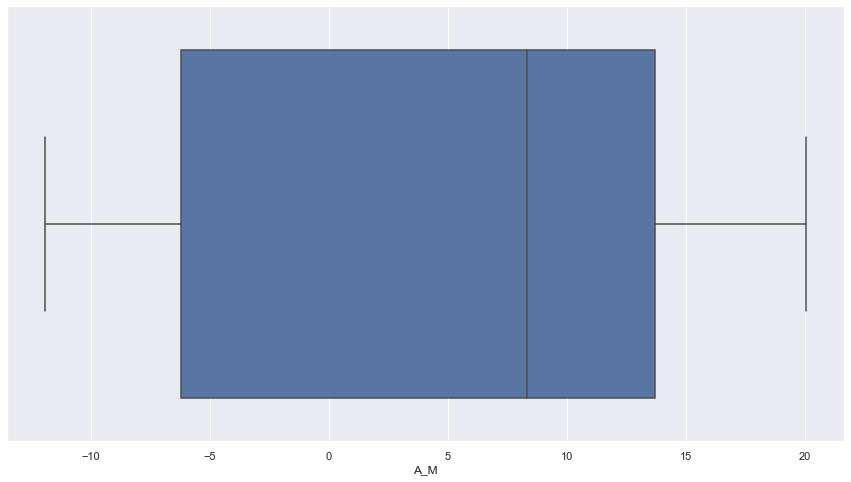

In [2211]:
sns.boxplot(data=df,x='A_M')
#not outliers here

In [2212]:
df['A_M']=np.abs(df['A_M'])

In [2213]:
df['A_M'].describe()

count    240.000000
mean      10.308121
std        4.849497
min        0.013000
25%        6.243750
50%       10.880000
75%       13.697500
max       20.060000
Name: A_M, dtype: float64

In [2214]:
#double check
df.duplicated().sum()

0

In [2215]:
df.isnull().mean()

Temperature       0.0
L                 0.0
R                 0.0
A_M               0.0
Color             0.0
Spectral_Class    0.0
Type              0.0
dtype: float64

In [2216]:
# let's check the correlation 

In [2217]:
df.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [2218]:
numeric_columns

Index(['Temperature', 'L', 'R', 'A_M'], dtype='object')

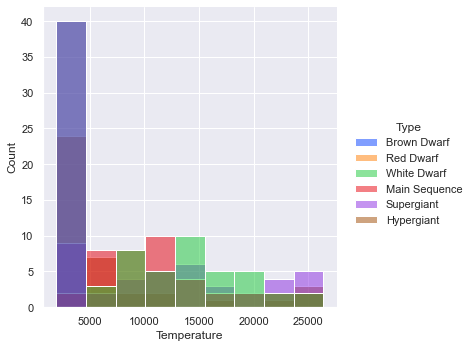

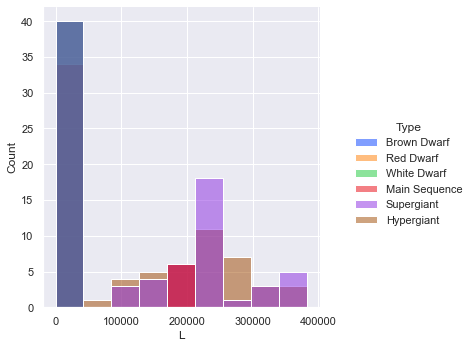

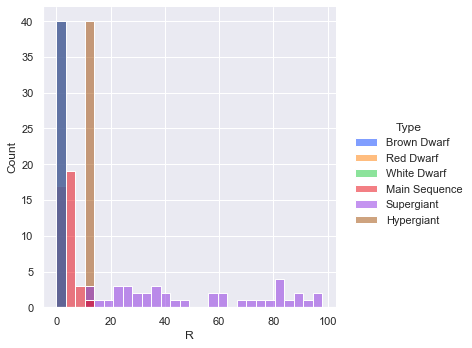

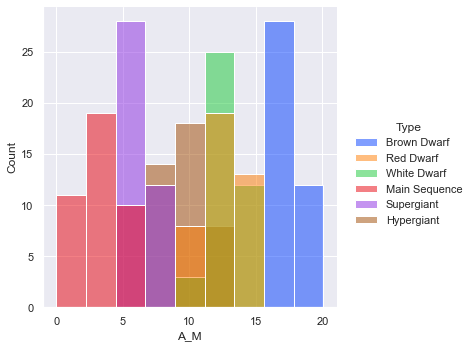

In [2219]:
for feature in numeric_columns:
    sns.displot(data=df,x=feature,hue='Type',palette='bright')

In [2220]:
df.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

<AxesSubplot:xlabel='Temperature', ylabel='L'>

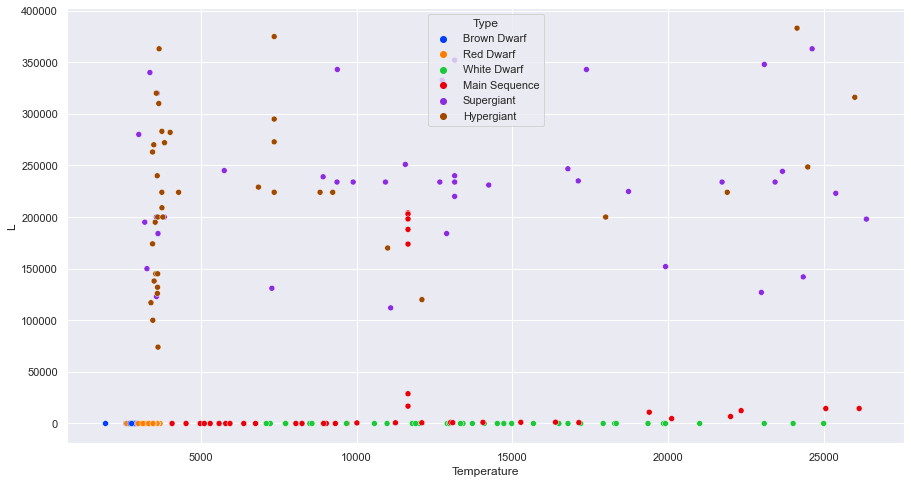

In [2221]:
sns.scatterplot(data=df,x='Temperature',y='L',hue='Type',palette='bright')

<AxesSubplot:xlabel='Temperature', ylabel='R'>

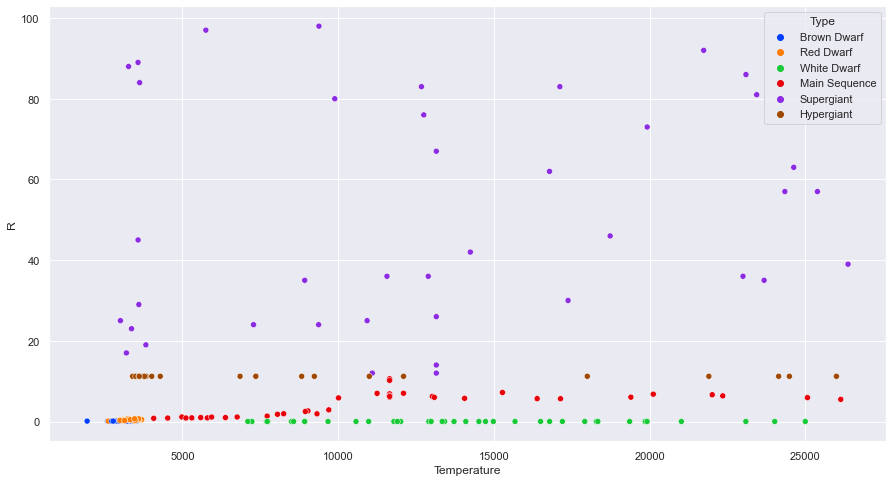

In [2222]:
sns.scatterplot(data=df,x='Temperature',y='R',hue='Type',palette='bright')

<AxesSubplot:xlabel='Temperature', ylabel='A_M'>

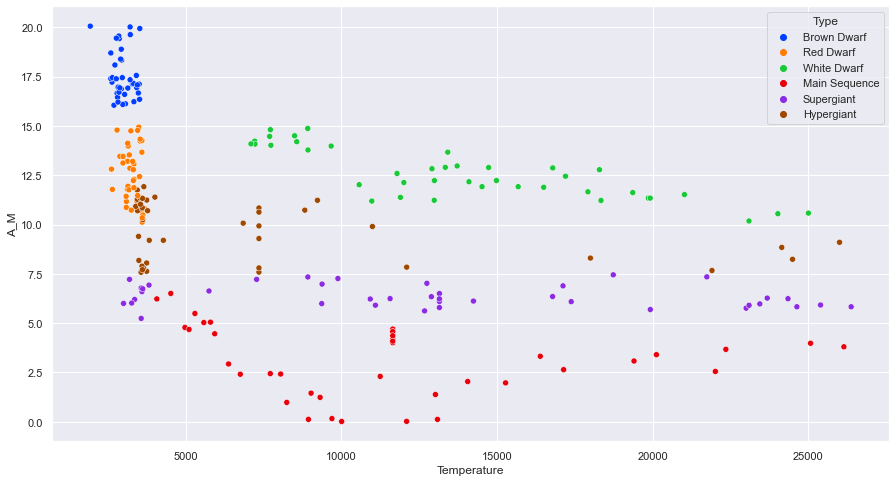

In [2223]:
sns.scatterplot(data=df,x='Temperature',y='A_M',hue='Type',palette='bright')

<AxesSubplot:xlabel='R', ylabel='L'>

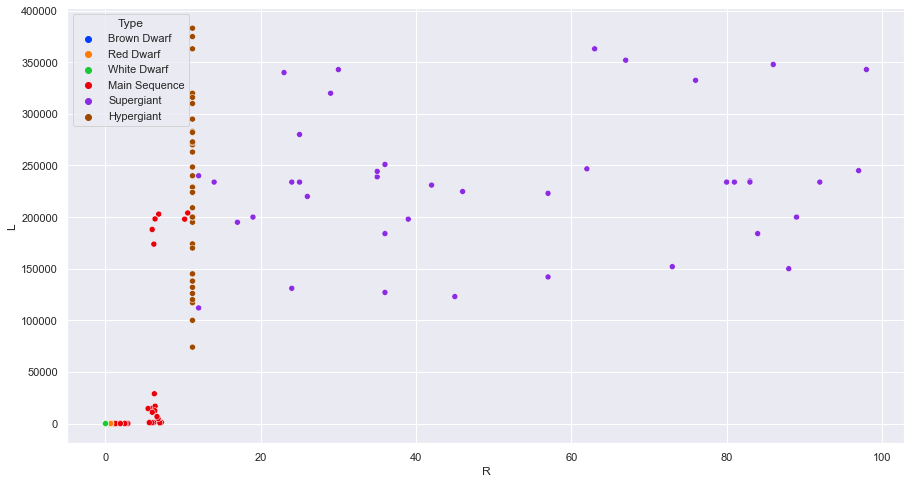

In [2224]:
sns.scatterplot(data=df,x='R',y='L',hue='Type',palette='bright')

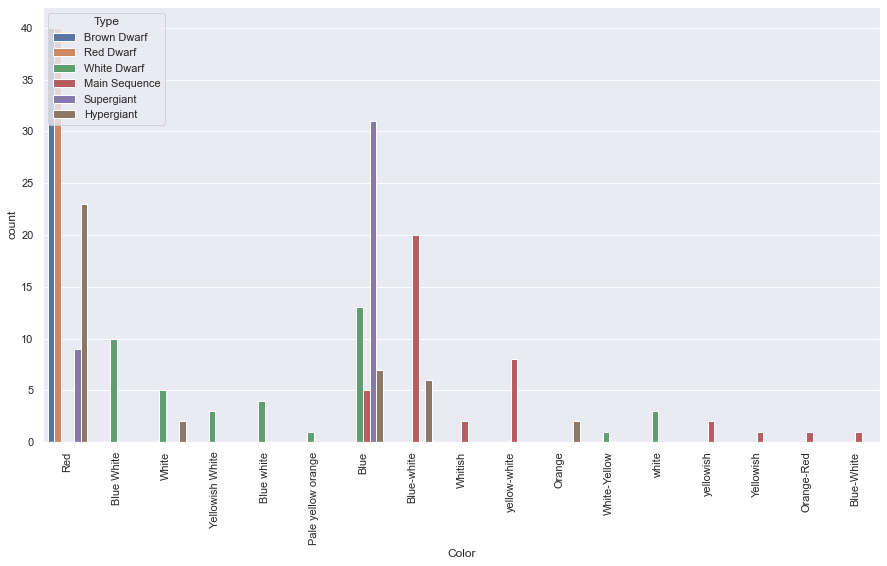

In [2225]:
sns.countplot(data=df,x='Color',hue='Type')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Spectral_Class', ylabel='count'>

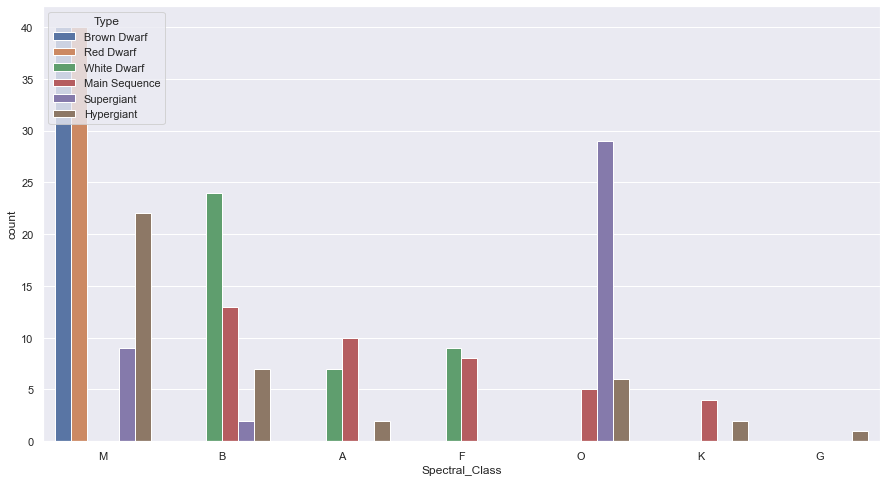

In [2226]:
sns.countplot(data=df,x='Spectral_Class',hue='Type')

In [2227]:
## Category Encoding 

In [2228]:
df['Spectral_Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [2229]:
spectral_dict={
    "A":1,
    "B":2,
    "F":3,
    "G":4,
    "O":5,
    "M":6,
    "K":7
}

In [2230]:
df['Spectral_Class']=df['Spectral_Class'].map(spectral_dict)

In [2231]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from category_encoders import BinaryEncoder

In [2232]:
target_encoder=LabelEncoder()

In [2233]:
df['Type']=target_encoder.fit_transform(df['Type'])

In [2234]:
df['Type'].value_counts()

0    40
3    40
5    40
2    40
4    40
1    40
Name: Type, dtype: int64

In [2235]:
color_encoder = BinaryEncoder()

In [2236]:
df_=color_encoder.fit_transform(df[['Color']])

In [2237]:
df=pd.concat([df,df_],axis=1)

In [2238]:
df.drop('Color',axis=1,inplace=True)

In [2239]:
df

,Temperature,L,R,A_M,Spectral_Class,Type,Color_0,Color_1,Color_2,Color_3,Color_4
0,3068.000000,0.002400,0.170000,16.12,6,0,0,0,0,0,1
1,3042.000000,0.000500,0.154200,16.60,6,0,0,0,0,0,1
2,2600.000000,0.000300,0.102000,18.70,6,0,0,0,0,0,1
3,2800.000000,0.000200,0.160000,16.65,6,0,0,0,0,0,1
4,1939.000000,0.000138,0.103000,20.06,6,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
235,7356.029412,374830.000000,11.209838,9.93,5,1,0,0,1,1,1
236,7356.029412,223970.187500,11.209838,10.63,5,1,0,0,1,1,1
237,8829.000000,223970.187500,11.209838,10.73,1,1,0,0,0,1,1
238,9235.000000,223970.187500,11.209838,11.23,1,1,0,0,0,1,1


In [2240]:
from  sklearn.model_selection import train_test_split

In [2241]:
x=df.drop('Type',axis=1)
y=df['Type']

In [2242]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,stratify=y,random_state=7)

In [2243]:
from sklearn.preprocessing import StandardScaler

In [2244]:
scaler=StandardScaler()

In [2245]:
columns_to_scaled=['Temperature','L','R','A_M']

In [2246]:
x_train[columns_to_scaled]=scaler.fit_transform(x_train[columns_to_scaled])

In [2247]:
x_test[columns_to_scaled]=scaler.transform(x_test[columns_to_scaled])

In [2248]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [2249]:
Logistic_model=LogisticRegression(multi_class='ovr',random_state=12)

In [2250]:
Logistic_model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr', random_state=12)

In [2251]:
y_train_pre=Logistic_model.predict(x_train)
y_test_pre=Logistic_model.predict(x_test)

In [2252]:
print("The Train dataset",accuracy_score(y_train,y_train_pre)*100,"%")
print("The Test dataset",accuracy_score(y_test,y_test_pre)*100,"%")

The Train dataset 95.09803921568627 %
The Test dataset 100.0 %


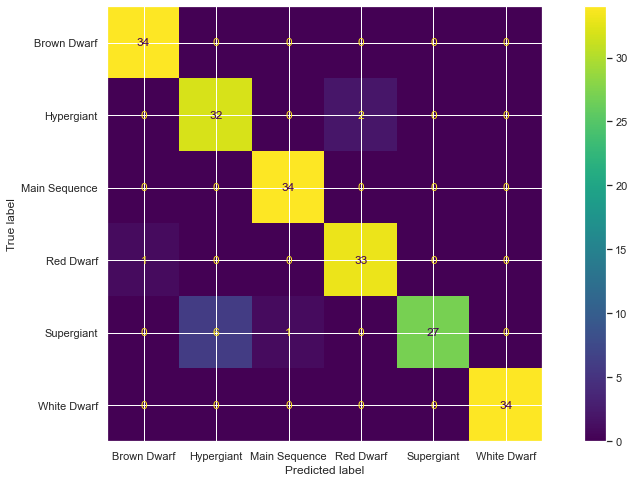

In [2254]:
cm = confusion_matrix(y_train , y_train_pre )
ConfusionMatrixDisplay(cm , display_labels=target_encoder.inverse_transform(Logistic_model.classes_)).plot()
plt.show()

In [2255]:
Logistic_model.predict_proba(x_test)

array([[7.66959157e-01, 8.60101577e-02, 3.19457576e-05, 9.14915947e-02,
        3.52020040e-04, 5.51551244e-02],
       [1.17018402e-05, 1.62827037e-01, 4.50165188e-01, 5.12658726e-03,
        3.81566404e-01, 3.03081641e-04],
       [2.01656633e-05, 9.69630888e-02, 4.17095703e-02, 6.73652293e-05,
        8.60769735e-01, 4.70075352e-04],
       [1.28503340e-03, 9.98716698e-03, 1.84755115e-02, 1.56486337e-03,
        5.87258681e-03, 9.62814838e-01],
       [7.48783503e-02, 5.18023769e-02, 1.72590550e-02, 8.47133085e-01,
        5.96714917e-03, 2.95998377e-03],
       [1.21165729e-05, 4.09207822e-01, 2.45059301e-02, 1.79934116e-05,
        5.66215234e-01, 4.09043302e-05],
       [9.05269611e-08, 1.11921018e-02, 7.10035090e-01, 2.36663375e-01,
        3.74440020e-02, 4.66534017e-03],
       [3.31596416e-07, 1.31625939e-02, 9.20545667e-01, 1.83501486e-02,
        2.47223026e-02, 2.32189566e-02],
       [1.17111210e-02, 2.66503447e-02, 1.34769847e-03, 1.82477783e-03,
        1.80764629e-03, 